## Loading the Dataset 

In [1]:
#load dataset
import pandas as pd
data = pd.read_csv("C:\\Users\\Admin\\Downloads\\Side Projects\\Golf Predictive Model\\Dataset\AnalysisFile.csv")

## EDA Data Exploration 

In [2]:
# check missing values
data.isnull().sum()


player        1
Height cm     1
Weight lbs    1
DOB           1
Age           1
             ..
Water         1
Bunkers       1
Slope         1
Length        1
Par           1
Length: 64, dtype: int64

In [3]:
print(data.describe())

          Height cm    Weight lbs           Age     player id  tournament id  \
count  14040.000000  14040.000000  14040.000000  1.404000e+04   1.404000e+04   
mean     182.517094    179.038675     33.340598  3.758954e+04   2.517518e+08   
std        5.937802     17.674858      6.674418  3.790586e+05   1.938858e+08   
min      168.000000    145.000000     19.000000  5.000000e+00   3.743000e+03   
25%      178.000000    165.000000     28.000000  1.259000e+03   3.771000e+03   
50%      183.000000    175.000000     32.000000  4.321000e+03   4.010253e+08   
75%      188.000000    190.000000     38.000000  6.931000e+03   4.010565e+08   
max      198.000000    250.000000     63.000000  4.412121e+06   4.012238e+08   

             season  final position         major      made_cut  \
count  14040.000000    14040.000000  14040.000000  14040.000000   
mean    2019.084259       19.583618      0.069160      0.582336   
std        0.918090       23.020980      0.253734      0.493192   
min     201

In [4]:
print(data.dtypes)

player         object
Height cm     float64
Weight lbs    float64
DOB            object
Age           float64
               ...   
Water         float64
Bunkers       float64
Slope         float64
Length        float64
Par           float64
Length: 64, dtype: object


In [5]:
#show top 10 columns with missing values 
data.isnull().sum().sort_values(ascending=False).head(10)


sg_putt_prev    2559
sg_arg_prev     2559
sg_app_prev     2559
sg_ott_prev     2559
sg_t2g_prev     2559
sg_app          2385
sg_t2g          2385
sg_ott          2385
sg_arg          2385
sg_putt         2385
dtype: int64

In [6]:

# COUNT THE amOUNT OF MISSING DATA IN THE Consecutive_Cuts_Made 
data['Consecutive_Cuts_Made'].isnull().sum()
# rEPLACE THE MISSING VALUES WITH 0
data['Consecutive_Cuts_Made'] = data['Consecutive_Cuts_Made'].fillna(0)


In [7]:
#count the amount of unique player id there are 
data['player id'].nunique()

320

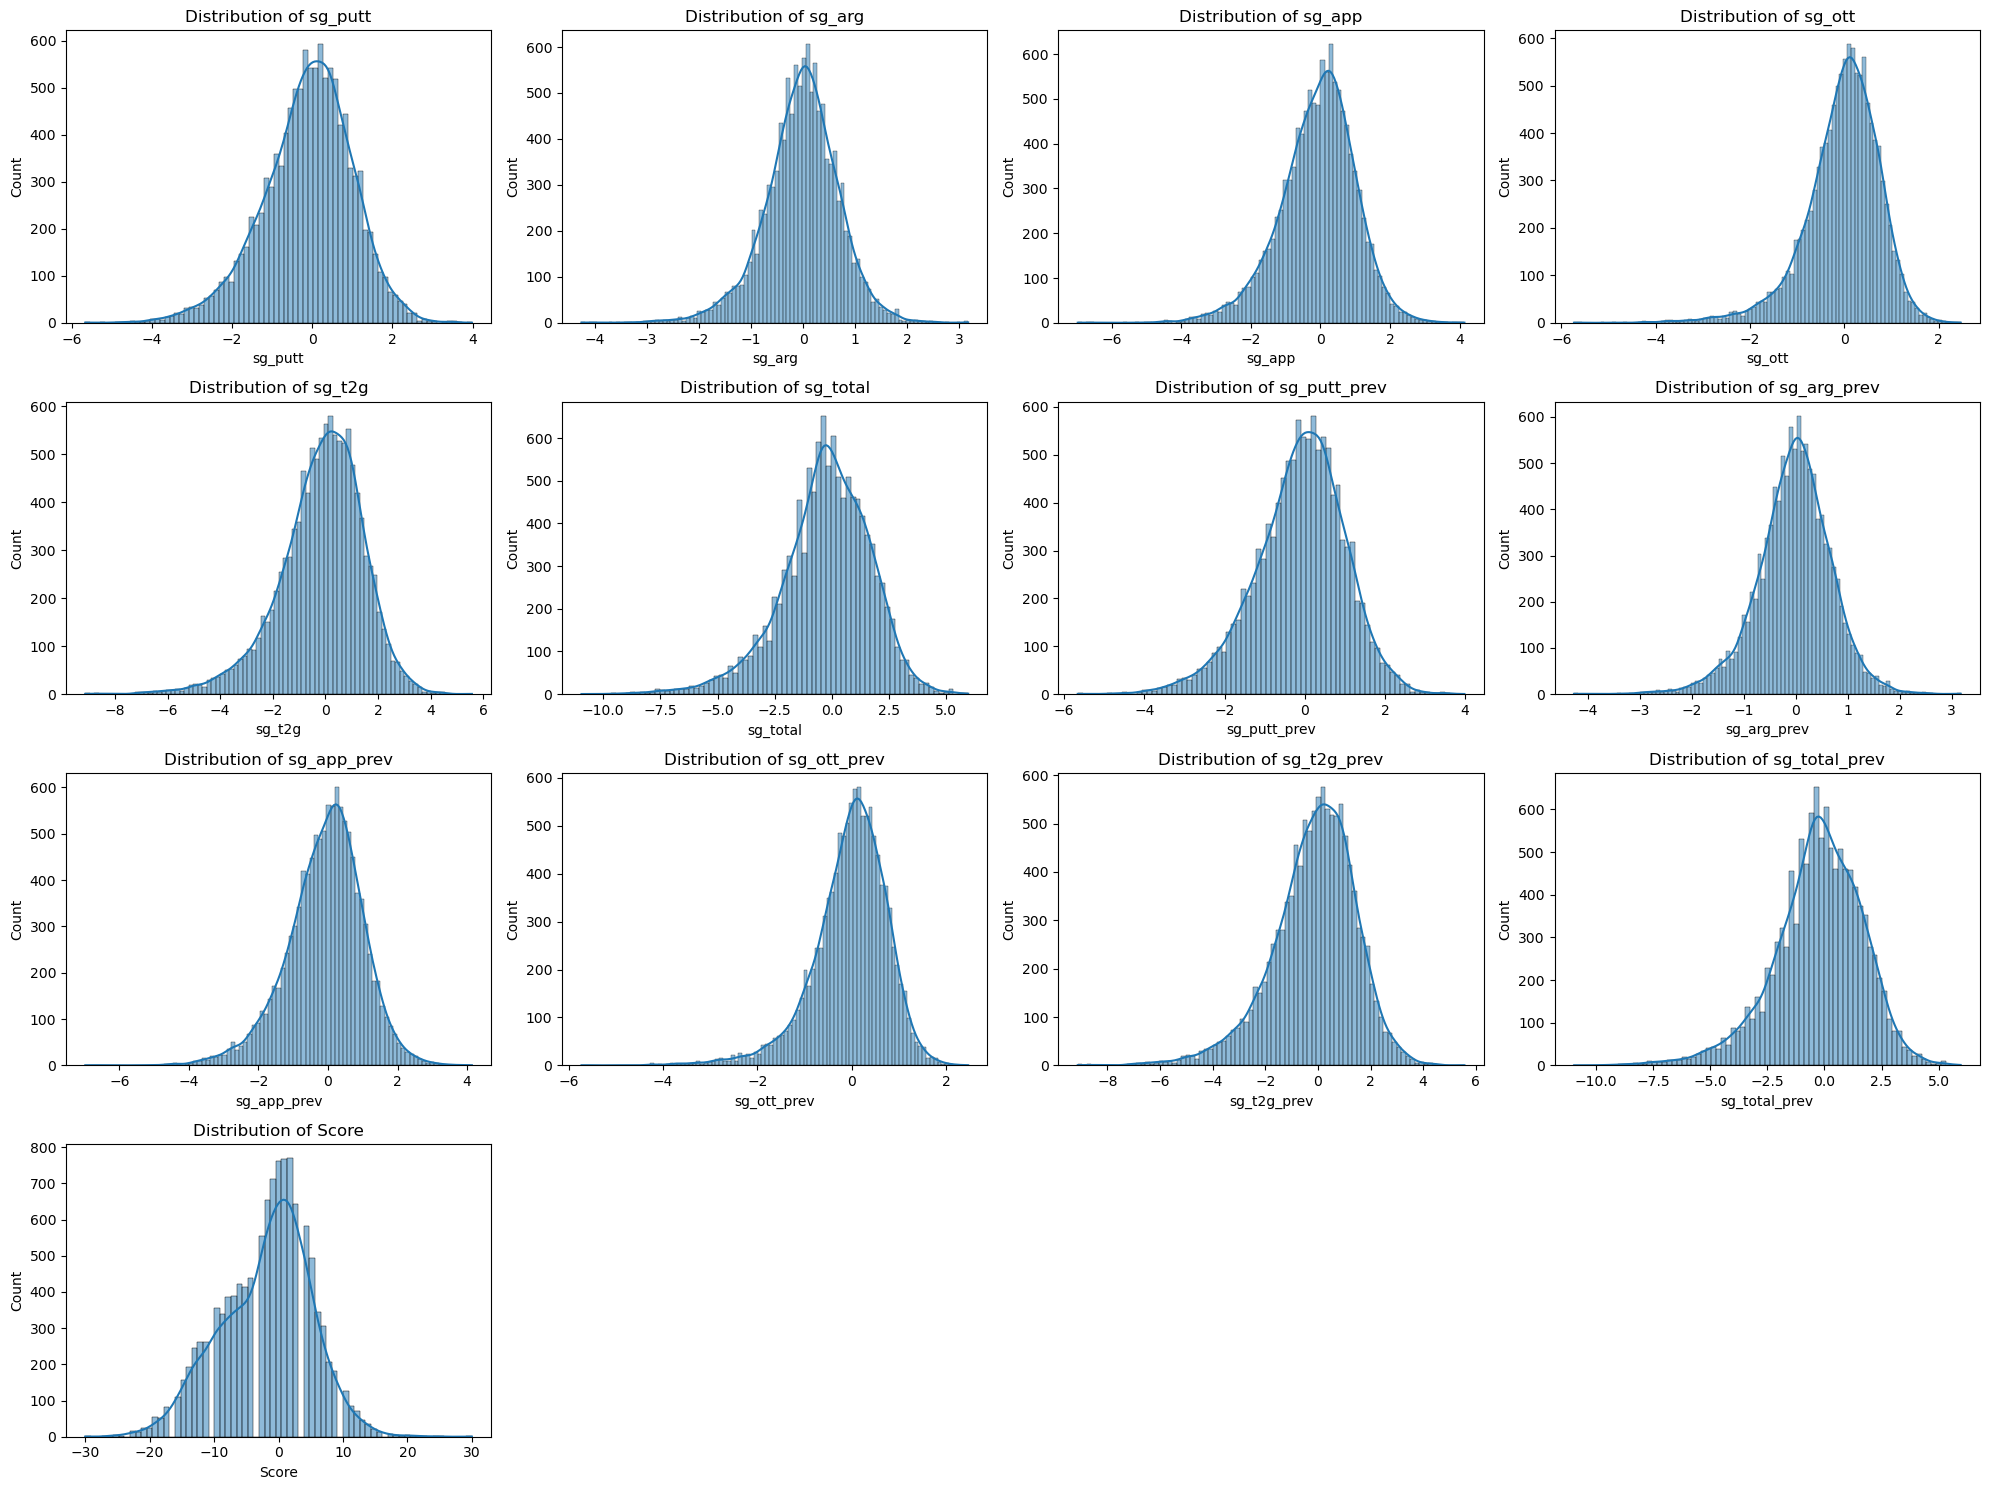

In [8]:
# look at the distribuution of columns 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'sg_putt_prev', 'sg_arg_prev', 'sg_app_prev', 'sg_ott_prev', 'sg_t2g_prev', 'sg_total_prev', 'Score'
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of columns you want to check
columns_to_plot = [
    'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total',
    'sg_putt_prev', 'sg_arg_prev', 'sg_app_prev', 'sg_ott_prev', 'sg_t2g_prev', 'sg_total_prev',
    'Score'
]

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Loop through the columns and create a subplot for each column
for index, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, index)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


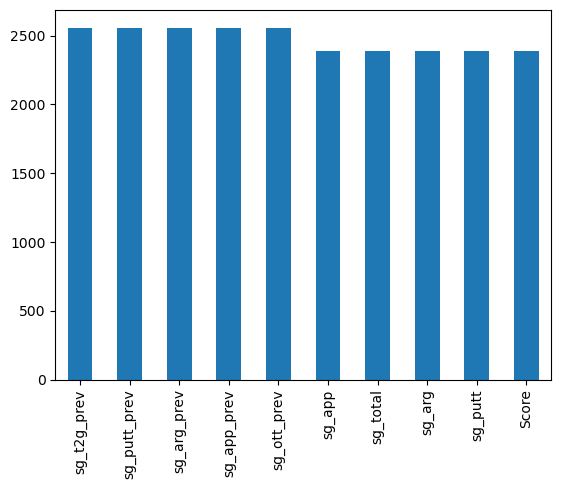

sg_t2g_prev     2559
sg_putt_prev    2559
sg_arg_prev     2559
sg_app_prev     2559
sg_ott_prev     2559
sg_app          2385
sg_total        2385
sg_arg          2385
sg_putt         2385
Score           2385
dtype: int64

In [9]:
# show me the counts of the columns with the highest missing values show in bar chart
import matplotlib.pyplot as plt
data.isnull().sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

data.isnull().sum().sort_values(ascending=False).head(10)


In [10]:
# show dimensions of the dataset 
data.shape

(14041, 64)

In [ ]:
# impute the missing values using a regression imputation sg_putt,	sg_arg,	sg_app,	sg_ott,	sg_t2g,	sg_total,	sg_putt_prev,	sg_arg_prev,	sg_app_prev,	sg_ott_prev,	sg_t2g_prev,	sg_total_prev
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)
data_imputed = imputer.fit_transform(data[['sg_putt',	'sg_arg',	'sg_app',	'sg_ott',	'sg_t2g',	'sg_total',	'sg_putt_prev',	'sg_arg_prev',	'sg_app_prev',	'sg_ott_prev',	'sg_t2g_prev',	'sg_total_prev']])
data_imputed = pd.DataFrame(data_imputed, columns=['sg_putt',	'sg_arg',	'sg_app',	'sg_ott',	'sg_t2g',	'sg_total',	'sg_putt_prev',	'sg_arg_prev',	'sg_app_prev',	'sg_ott_prev',	'sg_t2g_prev',	'sg_total_prev'])
data[['sg_putt',	'sg_arg',	'sg_app',	'sg_ott',	'sg_t2g',	'sg_total',	'sg_putt_prev',	'sg_arg_prev',	'sg_app_prev',	'sg_ott_prev',	'sg_t2g_prev',	'sg_total_prev']] = data_imputed


: 

: 

: 

In [ ]:
# Load data
# data = pd.read_csv('path_to_your_data.csv')
data['major'] = data['major'].astype('category')
data = pd.get_dummies(data, columns=['major'], drop_first=True)

In [ ]:
print("hello world")